---
### Problem 1: Expectation Maximization

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import normalize

In [2]:
# Load the input images
image_path = r"C:\Users\wodnj\Downloads\baby otters.jpg"
img = Image.open(image_path).convert('L').resize((256, 192))
pixels = np.array(img).flatten().astype(np.float64)

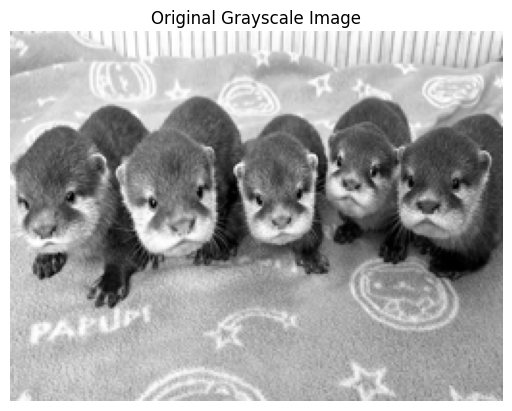

In [3]:
# Show the original grayscale image
plt.imshow(img, cmap = 'gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

In [4]:
def run_em_gmm(X, k, max_iter = 100, tol = 1e-3):

    """
    Runs the EM algorithm to fit a Gaussian Mixture Model to 1D data.

    Parameters:
        X (np.ndarray): 1D array of pixel intensities.
        k (int): Number of Gaussian components.
        max_iter (int): Maximum number of EM iterations.
        tol (float): Tolerance for log-likelihood convergence.

    Returns:
        means (np.ndarray): Means of the fitted Gaussians.
        variances (np.ndarray): Variances of the fitted Gaussians.
        weights (np.ndarray): Mixing coefficients.
        responsibilities (np.ndarray): Posterior probabilities for each data point.
    """

    n = X.shape[0]

    # Initialize parameters
    means = np.random.choice(X, k)
    variances = np.ones(k) * np.var(X)
    weights = np.ones(k) / k
    log_likelihoods = []
    
    for step in range(max_iter):

        # E-step: compute responsibilities
        responsibilities = np.zeros((n, k))
        
        for i in range(k):
            coeff = 1.0 / np.sqrt(2 * np.pi * variances[i])
            exponent = np.exp(-0.5 * ((X - means[i]) ** 2) / variances[i])
            responsibilities[:, i] = weights[i] * coeff * exponent

        # Normalize responsibilities across components
        responsibilities = responsibilities / responsibilities.sum(axis = 1, keepdims = True)
        
        # M-step: update parameters
        Nk = responsibilities.sum(axis = 0)
        weights = Nk / n
        means = (responsibilities * X[:, None]).sum(axis = 0) / Nk
        variances = ((responsibilities * (X[:, None] - means) ** 2).sum(axis = 0)) / Nk

        # Compute log-likelihood for convergence check
        ll = np.sum(np.log(responsibilities.sum(axis = 1)))
        log_likelihoods.append(ll)

        # Check for convergence
        if step > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return means, variances, weights, responsibilities

In [5]:
def segment_and_plot(X_original, responsibilities, k, shape, save = False):

    """
    Visualizes the segmentation result based on EM-GMM clustering.

    Parameters:
        X_original (np.ndarray): Flattened input data.
        responsibilities (np.ndarray): Posterior probabilities from EM.
        k (int): Number of clusters.
        shape (tuple): Original image shape.
        save (bool): Whether to save the output as an image file.
    """

    # Assign each pixel to the Gaussian with highest responsibility
    labels = np.argmax(responsibilities, axis = 1)

    # Reshape to original image dimensions
    segmented = labels.reshape(shape)

    # Display segmented image
    plt.imshow(segmented, cmap = 'gray')
    plt.title(f'Segmentation Result with K = {k}')

    # Save image if requested
    if save:
        plt.savefig(f'baby otters with gmm_segmentation_k{k}.png')

    plt.show()

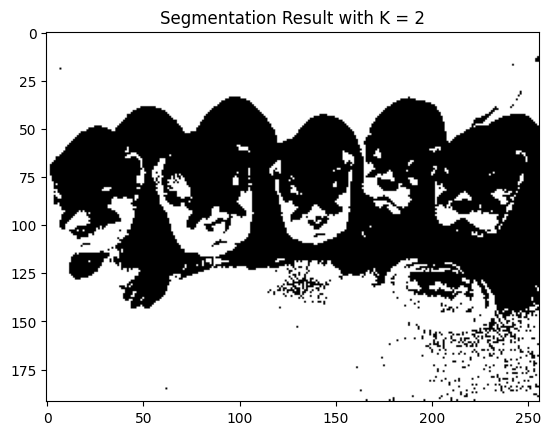

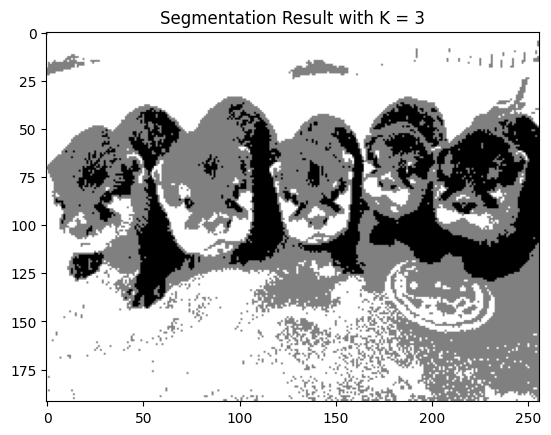

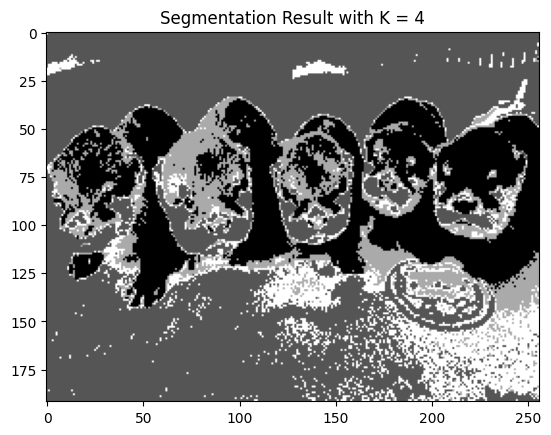

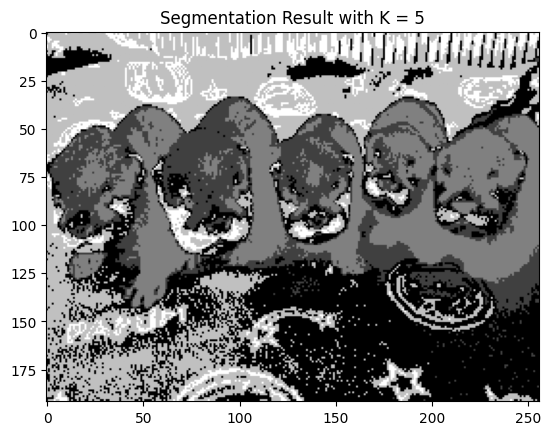

In [6]:
# Run EM-GMM segmentation for K = 2 to 5
image_shape = np.array(img).shape

for k in range(2, 6):
    means, vars_, weights, resp = run_em_gmm(pixels, k)
    segment_and_plot(pixels, resp, k, image_shape, save = True)